# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [2]:
# 模块导入
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate # 划分数据集函数
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [3]:
# 加载数据
data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


In [4]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [5]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
y = data_df['score']

In [6]:
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


In [7]:
y

200     100.00
201      99.09
202      98.69
203      97.64
204      97.51
         ...  
2195     44.03
2196     44.03
2197     44.03
2198     44.02
2199     44.02
Name: score, Length: 2000, dtype: float64

# 基本要求

## 一.划分训练集和测试集

In [8]:
RANDOM_SEED = 2024  # 固定随机数种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape # 输出数据行列信息

((2000, 8), (2000,), (1600, 8), (400, 8), (1600,), (400,))

In [9]:
X_train

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
325,68,161,69,478,73,170,118.0,100
753,210,447,800,478,590,355,452.0,552
400,205,167,99,478,119,166,155.0,426
895,210,754,800,230,952,225,897.0,737
409,171,173,114,456,197,114,180.0,338
...,...,...,...,...,...,...,...,...
739,210,557,363,344,354,355,472.0,637
840,210,521,800,478,358,355,554.0,552
808,210,597,493,233,557,355,716.0,481
1730,218,438,428,567,693,213,457.0,853


## 二、模型构建

In [10]:
# 调用sk-learn库中的线性回归模型
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)    #squared为Ture时，函数计算的是MSE;为False时则计算RMSE。
print('RMSE:',rmse)    # 均方根误差
print('R2:',r2_score(y_test,y_pred))    #决定系数

RMSE: 4.219887152247172
R2: 0.5796124574951917


# 三.对线性回归模型的系数进行分析

**均方根误差RMSE约为: 4.2199**
* RMSE 小于目标变量的 10%，表示模型预测效果很好。

**决定系数R<sup>2</sup>约为: 0.5796**
* 决定系数在0.5 - 0.7范围内，说明模型可以较好地解释因变量的方差。

### 各个特征所占权重如下:

In [11]:
coefficients =reg.coef_
coefficients_df = pd.DataFrame(coefficients, columns=['线性回归中各个特征所占权重'], index=feature_cols)
coefficients_df

,线性回归中各个特征所占权重
quality_of_faculty,-0.063031
publications,0.000392
citations,-0.000108
alumni_employment,-0.006909
influence,0.000241
quality_of_education,-0.005803
broad_impact,-0.002227
patents,-0.002344


In [12]:
intercept = reg.intercept_
print('截距项:',intercept)

截距项: 65.4157304582996


**quality_of_faculty的值为-0.063031**
* 数量级为10<sup>-2</sup>
* 是alumni_employment，quality_of_education，broad_impact，patents数量级的10倍左右
* 可见对结果影响最大的自变量是quality_of_faculty

# 扩展要求

## 一.计算自变量与因变量之间的皮尔逊相关系数

In [13]:
correlations = X.apply(lambda x: x.corr(y))
correlations.sort_values(ascending=True,inplace=True)
correlations.reset_index().rename(columns={'index':'feature', 0:'correlations'})

,feature,correlations
0,quality_of_faculty,-0.718075
1,quality_of_education,-0.604385
2,broad_impact,-0.531590
3,publications,-0.526862
4,influence,-0.526225
5,citations,-0.523585
6,alumni_employment,-0.493508
7,patents,-0.460210


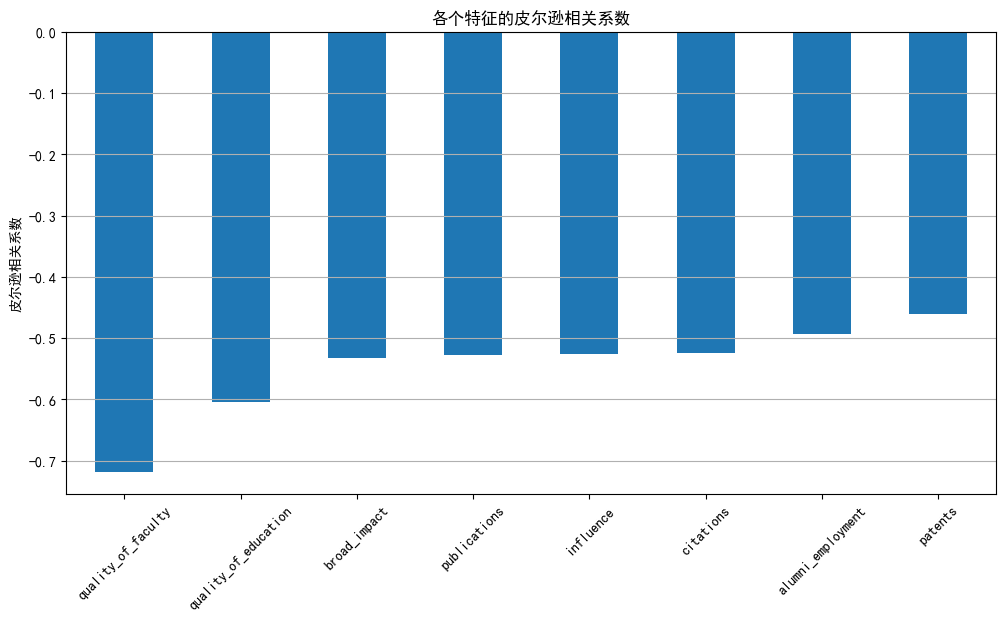

In [14]:
# 支持中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 防止负数乱码
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('各个特征的皮尔逊相关系数')
plt.ylabel('皮尔逊相关系数')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 总结:
1. 如图的八个自变量对因变量‘score’都有一定程度上的线性相关，且都为负相关，即变量值越大，得分越低
2. quality_of_faculty和quality_of_education这两个变量和score的线性相关程度比较高

## 二.尝试其他的回归模型
**1.尝试支持向量回归**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [16]:
# 进行特征缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# 建立svr模型并训练
svr = SVR()
svr.fit(X_train, y_train)

# 进行模型预测，并计算均方误差
y_pred = svr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
print('R2:',r2_score(y_test,y_pred))    #决定系数

Root Mean Squared Error: 3.726484748011338
R2: 0.6721713845283088


**2.尝试决策树回归**

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
print('R2:',r2_score(y_test,y_pred))    #决定系数

Root Mean Squared Error: 0.8562771163589511
R2: 0.9826908062545862


**3.尝试随机森林回归**

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
# 建立随机森林模型并训练
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# 进行模型预测，并计算均方误差
y_pred = rf_regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
print('R2:',r2_score(y_test,y_pred))    #决定系数

Root Mean Squared Error: 0.6933834387804471
R2: 0.988650020101593


### 总结:
如果我没做错的话，这个结果还是让我感觉蛮震惊的。尝试了其他三种回归模型，分别是**支持向量回归，决策树回归，随机森林回归**
* 线性回归的RMSE约为: 4.2199
* 支持向量回归的RMSE约为: 3.7265
* 决策树的RMSE约为: 0.85   （每次运行结果都不同，但一般都在这个值附近）
* 随机森林的RMSE约为: 0.66  （每次运行结果都不同，但一般都在这个值附近）
没想到线性回归的RMSE误差是最大的，但最让我感到惊奇的是决策树的误差居然这么小！

## 三.尝试将离散的地区特征融入线性回归模型，并对结果进行对比

In [21]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 'influence',
                'quality_of_education', 'broad_impact', 'patents', 'region']
X = data_df[feature_cols]
y = data_df['score']

In [22]:
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents,region
200,1,1,1,1,1,1,1.0,2,USA
201,4,5,3,2,3,11,4.0,6,USA
202,2,15,2,11,2,3,2.0,1,USA
203,5,10,12,10,9,2,13.0,48,United Kingdom
204,10,11,11,12,12,7,12.0,16,United Kingdom
...,...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816,Portugal
2196,218,997,645,566,908,236,981.0,871,Egypt
2197,218,830,812,549,823,367,975.0,824,Brazil
2198,218,886,812,567,974,367,975.0,651,Spain


In [23]:
# 对region特征进行one-hot编码
X_encoded = pd.get_dummies(X, columns=['region'])
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=RANDOM_SEED)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape # 输出数据行列信息

((2000, 9), (2000,), (1600, 67), (400, 67), (1600,), (400,))

### 融入离散地区特征后的线性回归模型

In [24]:
# 调用sk-learn库中的线性回归模型
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)    #squared为Ture时，函数计算的是MSE;为False时则计算RMSE。
print('RMSE:',rmse)    # 均方根误差
print('R2:',r2_score(y_test,y_pred))    #决定系数

RMSE: 4.201123757955341
R2: 0.5833425860394168


### 融入离散地区特征后的随机森林回归模型

In [25]:
# 调用随机森林回归模型进行对比
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# 进行模型预测，并计算均方误差
y_pred = rf_regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
print('R2:',r2_score(y_test,y_pred))    #决定系数

Root Mean Squared Error: 0.7790147944358895
R2: 0.9856735174718435


# 结论:
* 加入离散的特征后的模型拟合效果确实会好一点，不过和初始模型的差距不大，均方根误差减小了大约0.01，决定系数增大了大约0.01
* 其他的回归模型效果比线性回归效果好太多了，有可能特征与目标之间的关系不一定是线性的